In [0]:
from google.colab import files
files.upload()

# The Content of this chapter

- Look at the big picture
- Get the data
- Discover and visualized the data to gain insights
- prepare the data for ML algorithms
- select a model and train it
- fine-tune your model
- present your solution
- launch, monitor, and maintain your system


# Popular Opena Data Repositories

- http://archive.ics.uci.edu/ml/index.php
- https://www.kaggle.com/datasets
- https://registry.opendata.aws/



# First Task

### Build model to predict hous pricing in California using the California census data


# Performance Measure


<!-- <img src='.../img/rmse.png'>
<img src='../img/rmse_notation_1.png'>
<img src='../img/rmse_notation_2.png'> -->

In [0]:
import pandas as pd
import os

In [0]:
def load_housing_data():
    return pd.read_csv('housing.csv')

In [161]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [162]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [163]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

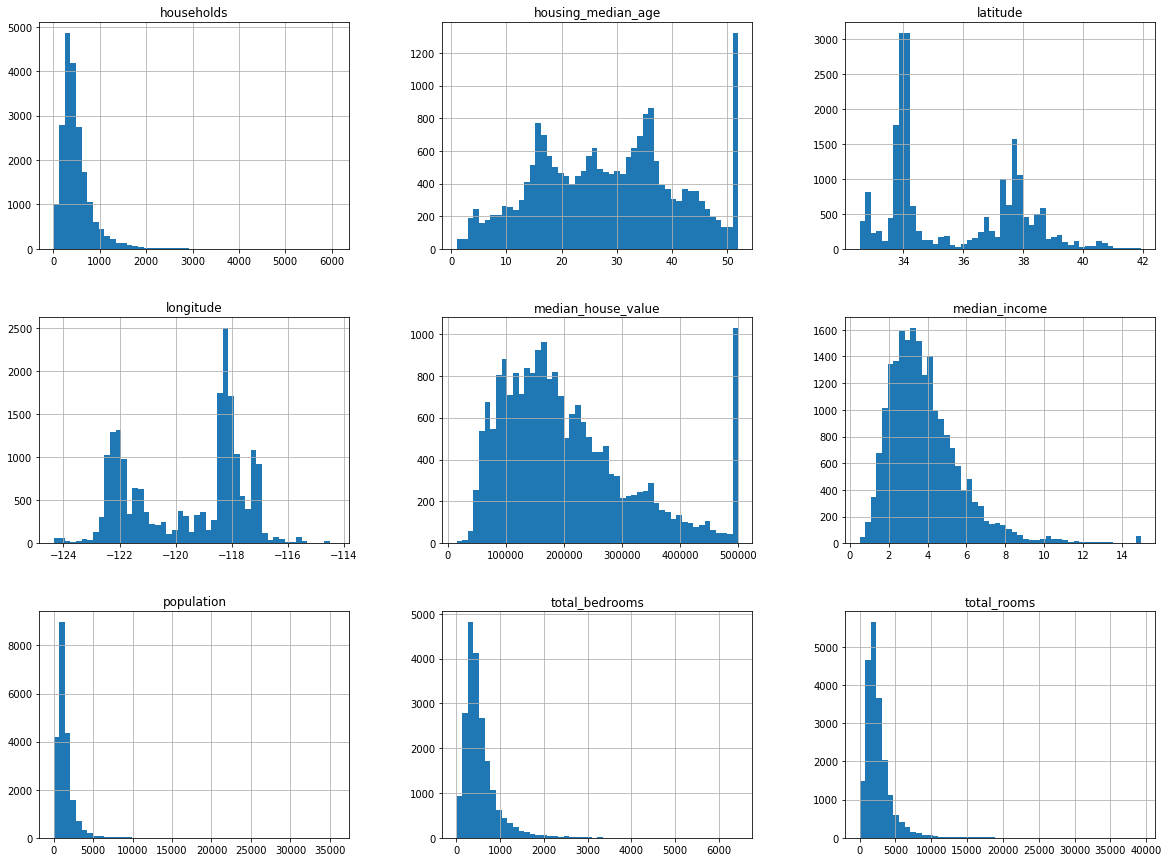

In [164]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

In [0]:
# train test split
import numpy as np


def train_test_split(data, test_ratio):
    shuffle_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffle_indices[:test_set_size]
    train_indices = shuffle_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [166]:
train_set, test_set = train_test_split(housing, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [0]:
# another way to split data
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(housing, test_size=0.2, random_state=42)

In [168]:
len(X_train), len(X_test)

(16512, 4128)

**Suppose you chatted with experts who told you that the median income is a very important attribute to predict median housing prices.**


plot the category of median_income to 5 class, taht is 1 to 5 class. class 1 mean the income in range between 0 to 15.000 (or less than 15.000), category 2 means the range between 15.000 to 30.000, and so on

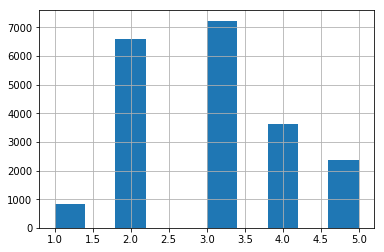

In [169]:
housing['income_cat'] = pd.cut(housing['median_income'], 
                               bins=[0., 1.5, 3., 4.5, 6., np.inf],
                               labels=[1,2,3,4,5])
housing['income_cat'].hist()

## Stratified Sampling based on income category

In [170]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]
    
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

# Exploring the Data

## Visualize Geographical Data [only plot the training set of the data]

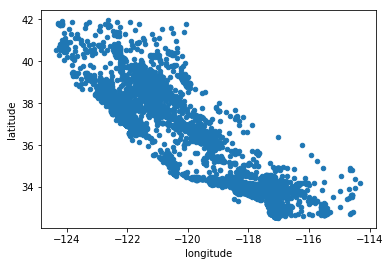

In [171]:
housing = strat_train_set.copy()

housing.plot(kind='scatter', x='longitude', y='latitude')

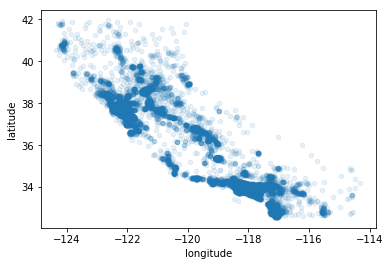

In [172]:
# or
# using alpha=0.1 to visualize easier the place where there is a high density of data points

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

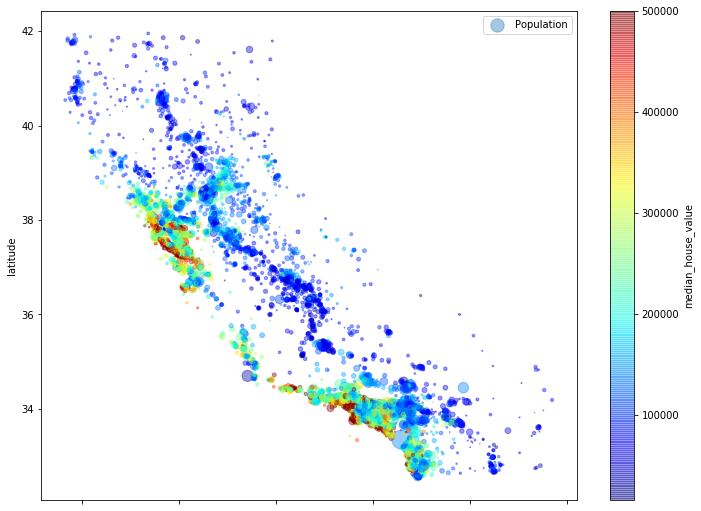

In [173]:
# plot the house price radius

housing.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, 
             s=housing['population']/100, 
             label='Population', 
             figsize=(12,9), 
             c='median_house_value', 
             cmap=plt.get_cmap('jet'), 
             colorbar=True)

plt.legend()

Saving california.png to california (1).png


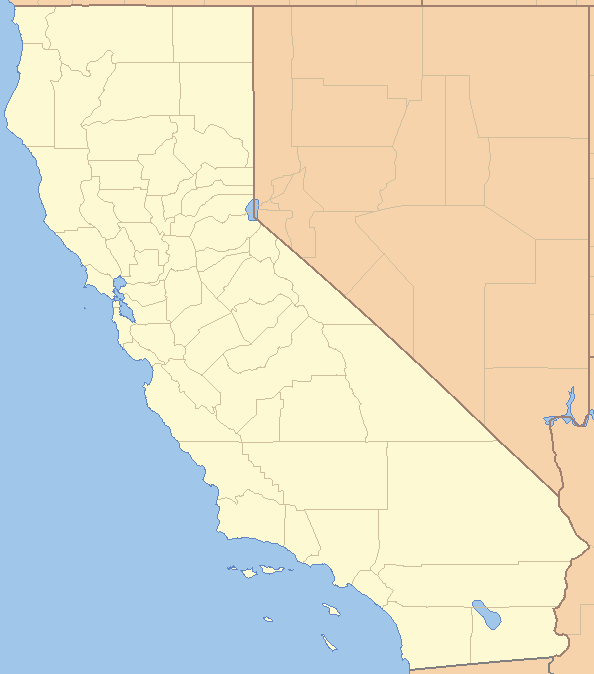

In [174]:
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['california.png']))
im

In [0]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure california_housing_prices_plot


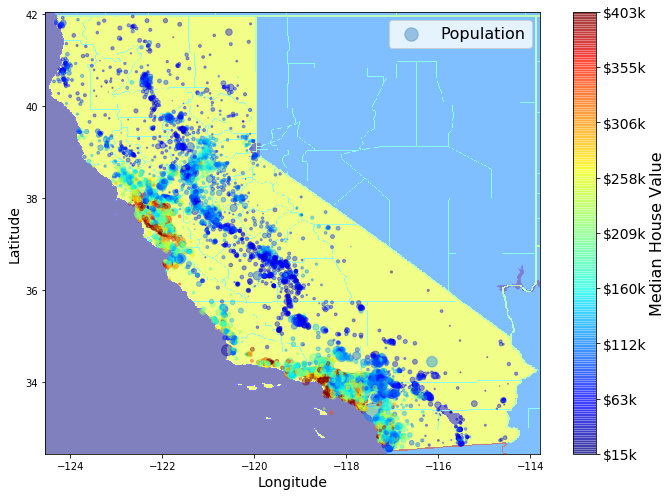

In [179]:
import matplotlib.image as mpimg

california_img = im
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## Looking for Correlations

is the standard correlation coefficient (Pearson's) between every pair of attribute using <br>

```
corr()
```

In [180]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

The crelation coefficient ranges from -1 to 1. When it is close to 1 taht menas :<br>
**That there is a strong positive correlation;** ***for example, the median house value tends to go up when the median income goes up.<br>***
<br>When the coefficient is close to -1 it emans:<br>
**That there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value,**  ***for exampleprice have slight tendency to go down when you go north***

## Another way to check correlation between attributes

in this case, we only plot correlation between median_house_value, median_income, total_rooms, housing_median_age

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff6f3df4e0>,
      dtype=object)

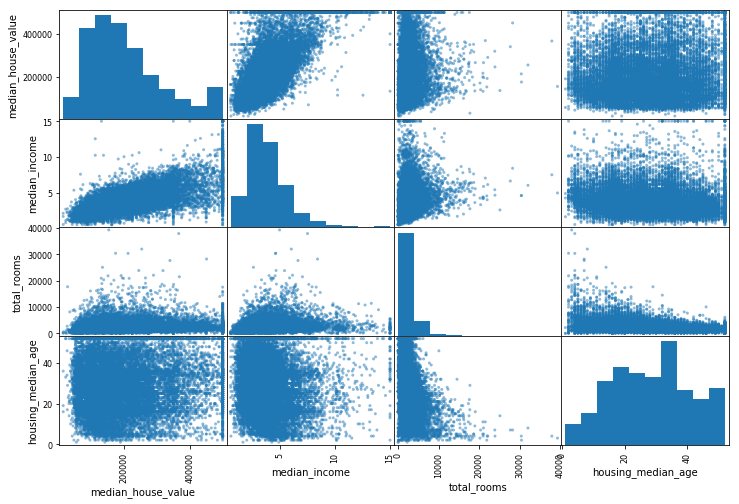

In [181]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize=(12,8))

## The most promising attribute to predict the median house value is the median_income

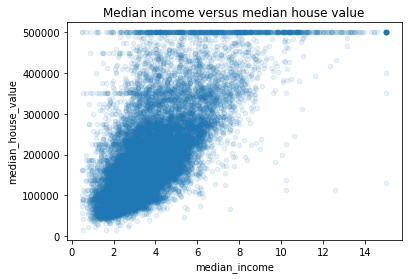

In [182]:
%matplotlib inline
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, title='Median income versus median house value')

## Experiment with Attribute Combinations

In this section we will yo try out various attribute combinations. For example, ***the total number of rooms*** in a district is not very useful if you don't know how many households there are.
***What you really want is the number of rooms per household***


Similarly, the ***total number of bedrooms by itself is not very useful*** you probably to ***compare it to the number of rooms***


and the ***population per household*** also seems like an interesting attribute to look at.

In [183]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_household'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

# looks the new correlation matrix again bellow
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_household     -0.259984
Name: median_house_value, dtype: float64

In [184]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3,4.505810,0.231341,3.047847


# Finally . . . !
# Prepare the Data for ML Algorithms

In [0]:
# make duplicate data for training set ()

housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [186]:
len(housing)

16512

Remove NaN value from dataset in column total_bedrooms


<img src='../img/preprocess_data_1.png'>


- option 1 ===> drop NaN from dataset
- option 2 ===> drop *COLUMNS_NAME* in datset
- option 3 ===> fill NaN using median value

In [187]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3


In [0]:
from sklearn.impute import SimpleImputer

In [189]:
imputer = SimpleImputer(strategy='median')

housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

## Handling Text and Categorical Attributes

In [190]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [0]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [192]:
housing_cat_encoder = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoder[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [193]:
# get the list of categories

ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Another way to convert text or categorical data


<!-- <img src='../img/1hot_encoder.png'>
<br><br>
<img src='../img/1hot_encoder_res.png'> -->


In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self # nothing else to do

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Feature Scaling and Transformation

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [0]:
num_pipeline = Pipeline([
    ('inputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [197]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

## Column Transformer on Scikit-Learn


How it works :
1. we import ColumnTransformer Class
2. get the list numerical column names and the list of categorical column names
3. construct a Columntransformer to housing dakta


In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipline.fit_transform(housing)

# Select and Train a Model

In [199]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [200]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipline.transform(some_data)
print('Predictions : ', lin_reg.predict(some_data_prepared))

Predictions :  [203682.37379543 326371.39370781 204218.64588245  58685.4770482
 194213.06443039]


In [201]:
print('labels : ', list(some_labels))

labels :  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [202]:
from sklearn.metrics import mean_squared_error


housing_pred = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_pred)
lin_rmse = np.sqrt(lin_mse)
print('RMS :\n', lin_rmse)

RMS :
 68376.64295459937


the result of RMSE is 68376.64295459937... is better than nothing but clearly not a great score : <span class="mark">most district median_housing_value range USD120.000 and USD265.000, sp typical prediction error of USD68.628</span>

## More Complex Model

In [203]:
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [204]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
rmse_score = np.sqrt(tree_mse)
print('RMSE DC : \n', rmse_score)

RMSE DC : 
 0.0


Not Error at All...? could this model realy absolutely perfect? Of Course... its much more likely <span class="burk">the model has badly overfit the data.</span> 

# Better Evaluation Using Cross-Validation


one way to evaluate Tree Model is using <span class="girk">train_split_test</span> function to split the training set into a smaller training set and a validate set, then train models gaints the smaller set anf evaluate them againts the validat.ion set.

In [0]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(tree_reg, 
                         housing_prepared, 
                         housing_labels, 
                         scoring='neg_mean_squared_error', 
                         cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [206]:
def display_scores(scores):
    print('Scores : \n', scores)
    print('Mean : \n', scores.mean())
    print('STD : \n', scores.std())
    
display_scores(tree_rmse_scores)

Scores : 
 [68836.11469713 66223.87557773 71935.70821118 69086.85871365
 71499.64126112 74564.1816598  71367.9483285  71352.61934582
 77968.93280595 70118.51488661]
Mean : 
 71295.43954875025
STD : 
 3061.2477423054747


Acording to the result : the DT model is overfitting so badly taht it performs worse than LinearRegression Model.

In [207]:
# Using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor



forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_pred = forest_reg.predict(housing_prepared)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [208]:
forest_mse = mean_squared_error(housing_labels, forest_pred)
forest_rmse = np.sqrt(forest_mse)
print('Forest RMSE : \n', forest_rmse)

Forest RMSE : 
 21873.237826096316


<span class="girk">Is much better than previous model, this is look very promising</span>

## Save RF-Model

In [209]:
from sklearn.externals import joblib


joblib.dump(forest_reg, 'forest_model.pkl')
# and to load the model is
# my_model_loaded = joblib.load('forest_model.pkl')

['forest_model.pkl']

In [210]:
!ls

 boston_housing.csv		      housing.csv
'california (1).png'		      sample_data
 california_housing_prices_plot.png   simpsons_episode.csv
 california.png			      simpsons_lines.csv
 forest_model.pkl		      spark-2.4.3-bin-hadoop2.7
'housing (1).csv'		      spark-2.4.3-bin-hadoop2.7.tgz
'housing (2).csv'


# Fine-Tune your Model


## Grid Search


```
GridSearchCV
``` to tell it which hyperparameter you wants values to try out, and evaluate all the possible combination of hyperparameter values.


using ```GridSearchCV``` for the best combination of hyperparameter values for the ```RandomForestRegressor```

In [0]:
from sklearn.model_selection import GridSearchCV

This ```param_grid``` tells Scikit-Learn to first evaluate all 3x4=12 combinations of ```n_estimators``` and ```max_features``` hyperparameter values specified in the first dict.

Then try all 2x3=6 combination of hyperparameter values in the second dict, but this time with the ```bootstrap``` hyperparameter  set to ```False``` instead of ```True```(which is the default value for this parameter).


All in all, the grid search will ***explore 12+6 = 18 combination*** of ```RandomForestRegressor``` hyperparameter values, and it **will train each model five times (since we are using five-fold cross validation)**.


In other words, there will be 18x5 = 90 rounds of training. it may takes a long time, **but when it is done you can get the best combination of parameters**. 

In [212]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, 
                           param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


the best combiantion parameter is :

In [213]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [214]:
# you can get estimator direcly

grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [215]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)

63772.77647707092 {'max_features': 2, 'n_estimators': 3}
55460.45597827339 {'max_features': 2, 'n_estimators': 10}
52760.926394988506 {'max_features': 2, 'n_estimators': 30}
61034.18689053081 {'max_features': 4, 'n_estimators': 3}
53617.111297174255 {'max_features': 4, 'n_estimators': 10}
51258.03131934109 {'max_features': 4, 'n_estimators': 30}
60759.29654355671 {'max_features': 6, 'n_estimators': 3}
52699.99951765786 {'max_features': 6, 'n_estimators': 10}
50948.38057173586 {'max_features': 6, 'n_estimators': 30}
59644.67590384116 {'max_features': 8, 'n_estimators': 3}
53249.30652164751 {'max_features': 8, 'n_estimators': 10}
50650.84620567914 {'max_features': 8, 'n_estimators': 30}
62389.641144389396 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54434.67397351221 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60492.0982094022 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53856.41183202515 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

# Randomized Search

to find the best hyperparameter from large *search space*, with much combinations. This approah has two main benefits : 
- if you let the randomized search run for, say 1000 iterations, this approach will explore 1000 different values for each hyperparameter.

- you have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations. 

# Ensemble Methods

another way to fine-tune your system is to combine the mdoels taht perform best. The group (or ***Asemble***) will perform better than the individual model, ***(just like RandomForest perform best from individial DecisionTrees )***.

# Analyze the Best Models and Their Errors

In [216]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.23931512e-02, 5.58143222e-02, 4.56223373e-02, 1.68158410e-02,
       1.53999586e-02, 1.60625863e-02, 1.50104583e-02, 3.17543315e-01,
       1.34792907e-01, 3.34321149e-02, 1.10932489e-01, 4.04672248e-02,
       9.20496940e-03, 1.20367723e-01, 8.65789858e-05, 2.44521829e-03,
       3.60880350e-03])

In [217]:
# Lets display these importance scores next to their corresponding attributes names

print('Feature Importances List : \n\n')
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

Feature Importances List : 




[(0.31754331500481087, 'median_income'),
 (0.1347929074305947, 'income_cat'),
 (0.12036772338072904, 'INLAND'),
 (0.1109324894327777, 'pop_per_hhold'),
 (0.06239315116018702, 'longitude'),
 (0.055814322234879914, 'latitude'),
 (0.045622337294557794, 'housing_median_age'),
 (0.040467224768843804, 'bedrooms_per_room'),
 (0.033432114940575144, 'rooms_per_hhold'),
 (0.016815841027233134, 'total_rooms'),
 (0.016062586256729953, 'population'),
 (0.015399958573111187, 'total_bedrooms'),
 (0.015010458321147483, 'households'),
 (0.00920496939731926, '<1H OCEAN'),
 (0.003608803502118112, 'NEAR OCEAN'),
 (0.0024452182886349353, 'NEAR BAY'),
 (8.657898575010053e-05, 'ISLAND')]

with this information you may drop want to drop some attribute of useless.

# Evaluate Your System on the Test Set

After twaking the models for a while, than you eventually have a mdoel that performs sufficiently well. Now is the time to evaluate the final model on the test set.


is nothing special about this process, just get the predictions and the labels from your test set, run your ```final_pipeline``` to transform the data **(using call ```transform()```, not ```fit_transform()```)**

In [0]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [219]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN,5
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,<1H OCEAN,4
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,<1H OCEAN,3
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,INLAND,3
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,INLAND,3
20552,-121.80,38.68,11.0,3851.0,892.0,1847.0,747.0,3.4331,INLAND,3
19989,-119.32,36.19,11.0,1281.0,291.0,861.0,313.0,1.0962,INLAND,1
17049,-122.26,37.46,26.0,5067.0,750.0,1996.0,728.0,7.0001,NEAR OCEAN,5
13692,-117.24,34.13,26.0,3774.0,716.0,1913.0,620.0,3.3534,INLAND,3
13916,-116.15,34.14,18.0,3312.0,705.0,1251.0,512.0,3.0139,INLAND,3


In [220]:
y_test

5241     500001.0
10970    240300.0
20351    218200.0
6568     182100.0
13285    121300.0
20552    120600.0
19989     72300.0
17049    500001.0
13692     98900.0
13916     82600.0
20374    399400.0
18776     78600.0
16531    212500.0
14690    174100.0
17812    258100.0
16570    121400.0
5814     221900.0
5473     334700.0
7888     337400.0
5376     340400.0
10383    184800.0
16815    272700.0
11142    180000.0
2554      72200.0
14472    274400.0
5986     212500.0
15825    400000.0
6472     251600.0
4309     208800.0
20066    105200.0
           ...   
2735      62500.0
918      196900.0
2343      93600.0
9989     143400.0
7560     118100.0
2286      75100.0
11342    161800.0
11438    363100.0
15190    261500.0
1075      97000.0
17934    235500.0
9498     158800.0
13279    115800.0
2344      88900.0
3118      54300.0
11782    136500.0
11298    177900.0
15643    287500.0
455      287500.0
4038     500001.0
5353     500001.0
15763    412500.0
3239      64700.0
13114    148100.0
3115      

In [221]:
len(X_test), len(y_test)

(4128, 4128)

In [0]:
X_test_prepared = full_pipline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [223]:
print('Final MSE is : ', final_mse)

Final MSE is :  2364982143.6021748


In [224]:
print('Final RMSE is : ', final_rmse)

Final RMSE is :  48631.08207311631


For productions model is must be perform better for example 95% confidence interval, it can be calculated by using 
```
scipy.stats.t.interval()
```

In [225]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
       loc=squared_errors.mean(),
       scale=stats.sem(squared_errors)))

array([46604.55548841, 50576.47372971])

Now comes the project prelaunch phase: you need to present your solution (high‐lighting what you have learned, what worked and what did not, what assumptionswere made, and what your system’s limitations are), document everything, and createnice presentations with clear visualizations and easy-to-remember statements (e.g.,“the median income is the number one predictor of housing prices”). In this Califor‐nia housing example, the final performance of the system is not better than theexperts’, but it may still be a good idea to launch it, especially if this frees up sometime for the experts so they can work on more interesting and productive tasks.

# Bonus 

## GridSearchCV

In [227]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=10.0, kernel=linear, total=  11.0s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.0s remaining:    0.0s


[CV] ............................ C=10.0, kernel=linear, total=  10.8s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=  10.6s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=  10.7s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=  10.7s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=  10.6s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=  10.7s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=  10.5s
[CV] C=30.0, kernel=linear ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 69.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

In [228]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70338.3943906172

In [229]:
grid_search.best_params_

{'C': 1000.0, 'kernel': 'linear'}

The linear kernel seems better than the RBF kernel. Notice that the value of C is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for C (removing the smallest values), because it is likely that higher values of C will be better.

